## Изучение продолжительности жизни по странам и индивидам

Часть I.
Цель: прогнозирование средней продолжительности жизни в стране

Источник: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Этапы работы:
1. Загрузка и предобработка данных
2. Анализ данных
3. Создания модели МО и определение ключевых признаков

Часть II.
Цель: изучение продолжения жизни индивида в США

Источник: https://www.kaggle.com/datasets/cdc/mortality/data

Этапы работы:
1. Загрузка и предобработка данных
2. Анализ данных
3. Создания модели МО и определение ключевых признаков 

In [3]:
# Библиотеки для работы с данными 
import numpy as np
import pandas as pd

# Бибилиотеки для визуалиазации данных
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Бибилиотеки для работы с метриками 
from sklearn.metrics import mean_squared_error, roc_auc_score

# Библиотеки для разделения дата фрейма на выборки
from sklearn.model_selection import train_test_split 

# Бибилиотеки для предобработки входящих данных
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder


# Бибилиотеки для автоматизации подготовки моделей
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer


# Библотеки для построения модели машинного обучения 
from sklearn.linear_model import LinearRegression
from catboost import CatBoostClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier

# Библиотека для построения корреляционной матрицы
import phik

import random
from sklearn.inspection import permutation_importance

## Часть I. Прогнозирование средней продолжительности жизни в стране 
- country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
- year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
- status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
- life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
- adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
- infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
- alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
- percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
- hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
 measles (Ratio) - number of reported Measles cases per 1000 population
- bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
- under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
- polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
- total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
- diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
- gdp (Ratio) - Gross Domestic Product per capita
- population (Ratio) - population of a country
- thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more - - accurately represent the variable)
- thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
- income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- schooling (Ratio) - average number of years of schooling of a population
### I.I Загрузка данных и предобработка

In [5]:
# импорт файла
ldc = pd.read_csv('LED.csv')
# измененение стиля написания заголовков
ldc.columns = ldc.columns.str.lower().str.replace(' ', '_')

In [6]:
display(ldc.head())  # первые 10 строк 
display(ldc.tail())  # последние 10 строк

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [7]:
display(ldc.info()) # общее описание данных
display(ldc.describe()) # количественные характеристики данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy_                 2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles_                         2938 non-null   int64  
 10  _bmi_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   int64  
 12  polio               

None

,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
print(ldc.isna().sum()) # определение количества пропусков по признакам

country                              0
year                                 0
status                               0
life_expectancy_                    10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles_                             0
_bmi_                               34
under-five_deaths_                   0
polio                               19
total_expenditure                  226
diphtheria_                         19
_hiv/aids                            0
gdp                                448
population                         652
_thinness__1-19_years               34
_thinness_5-9_years                 34
income_composition_of_resources    167
schooling                          163
dtype: int64


In [9]:
ldc = ldc.dropna()  #  удалене строк по которым отсуствуют данные

### I.II Анализ данных
определим выбросы у данных и сделаем корреляционную матрицу

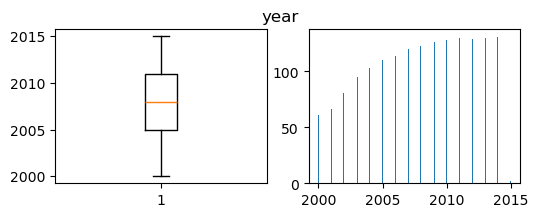

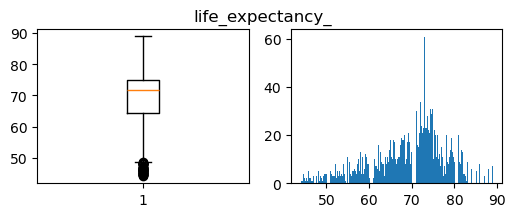

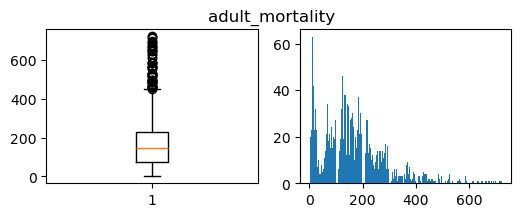

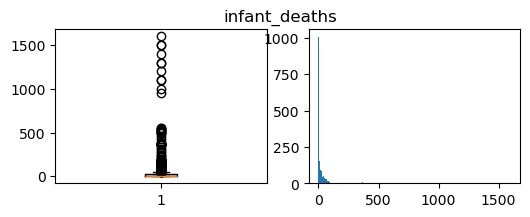

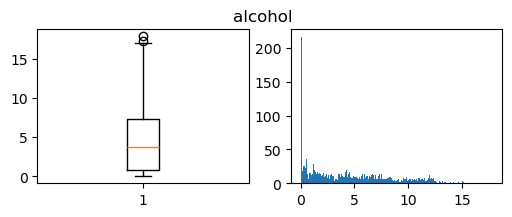

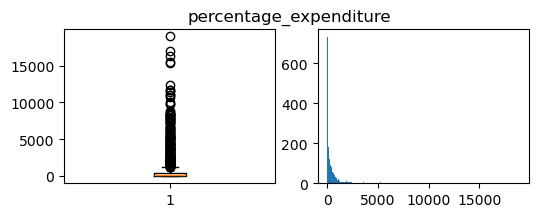

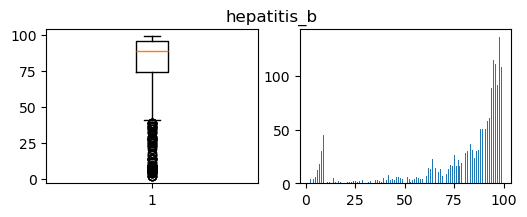

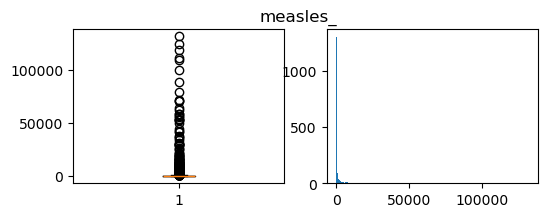

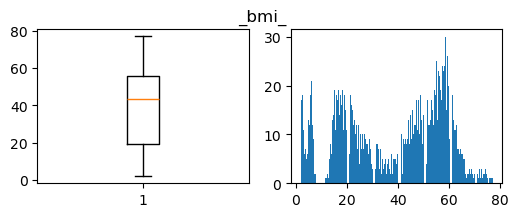

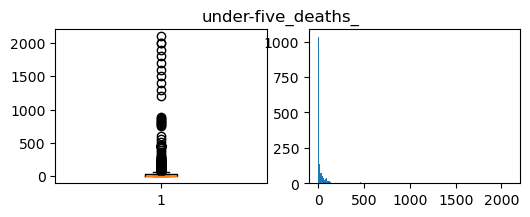

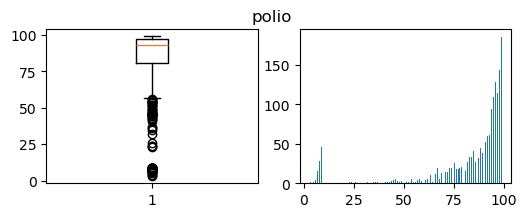

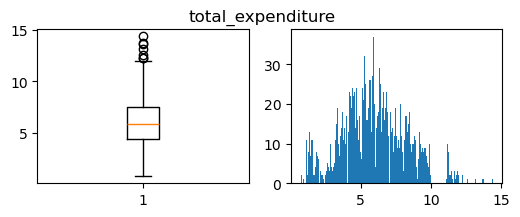

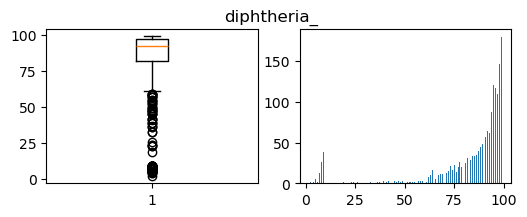

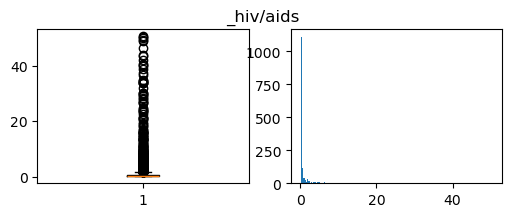

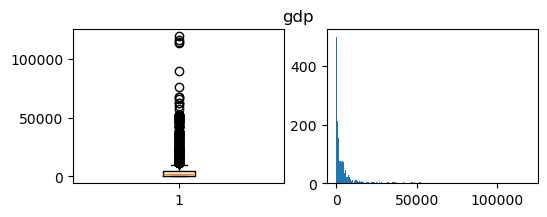

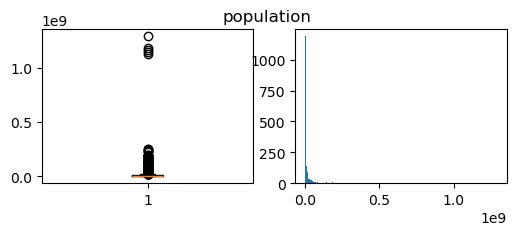

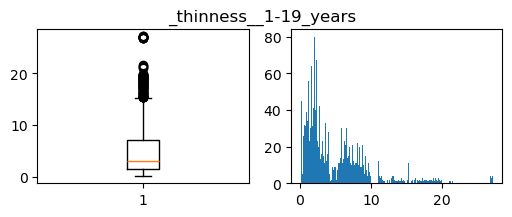

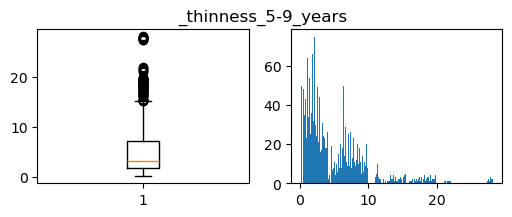

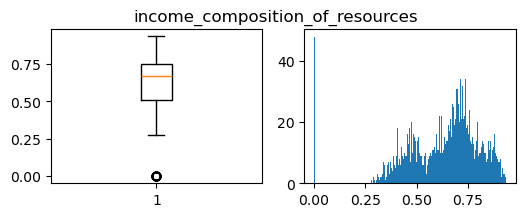

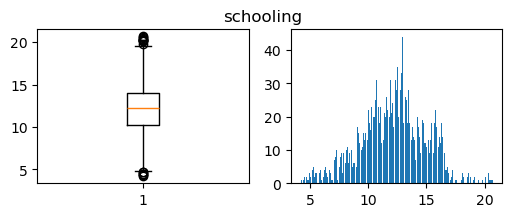

In [11]:
for i in ldc.columns:
    if ldc[i].dtype != 'object':
        plt.rcParams["figure.figsize"] = (6,2)
        fig, axs = plt.subplots(1, 2)
        axs[0].boxplot(ldc[i])
        axs[1].hist(ldc[i], bins = 200)
        fig.suptitle (i)
        plt.show()

Наибольшее количество выбросов замечено по таким признакам, как 
 - процетные расходы
 - забловаемость гипотита (выбросы ниже 1,5 межквартельного размаха)
 - забалеваемость кори (выше 1,5 межквартильных размахов)
 - заболевамость ВИЧ (выше)
 - ВВП (выше)
 - наслеене (выше)
 - образование

Однако, все выбросы имеют логическое обоснование и их удаление лишь ухудшить качество модели

**Посмотрим на корреляцию признаков**

Уберем признаки 'страна' и 'год' так, как он не влияет на целевой показатель (нам важно описание страны)

In [14]:
ldc_rus = ldc.copy()
ldc = ldc.drop(['country', 'year'], axis = 1)

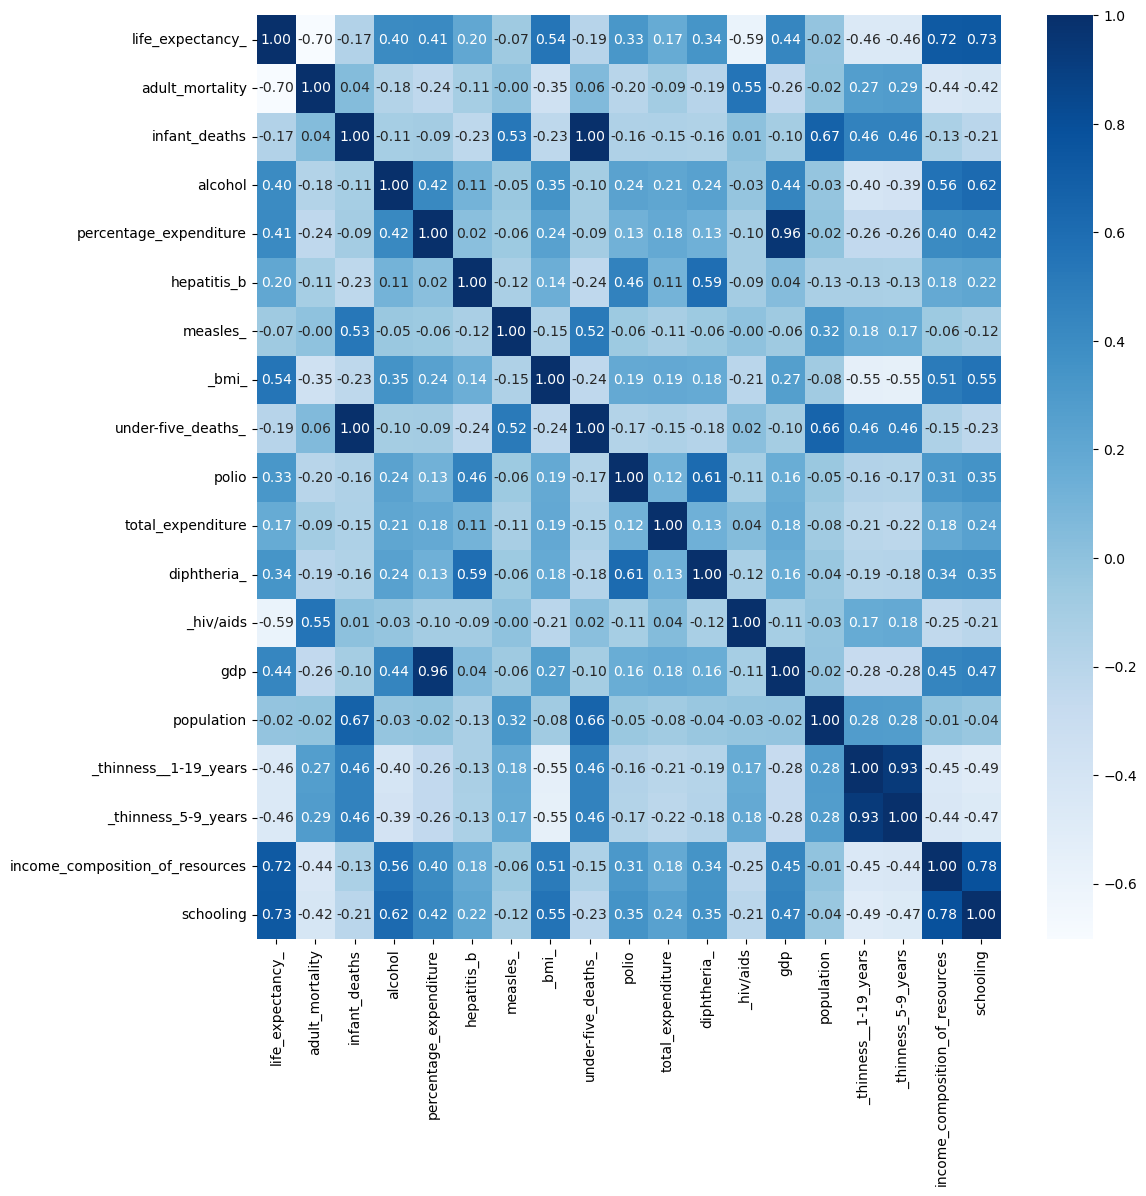

In [15]:
# создание корреляционной матрицы
matrix = ldc.drop('status', axis = 1).corr()
plt.rcParams["figure.figsize"] = (12,12)
sns.heatmap(matrix, cmap="Blues", annot=True, fmt='.2f')
plt.show()

Как видно из матрицы выше корреляция больше 0.85 (возьмем как рубеж для определения автокорреляция есть между ВВП и процентными расходами и детской смерности с детским недоеданием от 5 до 9  и смертностью от 1-19).Целевой параметр прожолжительности жизни больше всего коррелирует с **income_composition_of_resources** и **образованием**

In [17]:
ldc = ldc.drop(['_thinness__1-19_years', 'percentage_expenditure', 'infant_deaths', 'adult_mortality'], axis =1)

### I.III Создание модели МО
 - выделение ключевого признака
 - деление на test, train
 - построение pipeline с кодированием признаков типа 'object'

Проведения балансирования не нужно так, как данные количественные

In [19]:
target = ldc['life_expectancy_']
features = ldc.drop('life_expectancy_', axis = 1)

In [20]:
# деление на тренировочную и тестовую
target_train, target_test, features_train,   features_test = train_test_split(target, features, test_size = 0.25)

# определение количественных  и качественных признаков 
def cat_num(df_total):
    col_num = []
    col_cat = []
    for i in df_total.columns:
        if i == 'senior_citizen':
            col_cat.append(i)
            continue
        try:
            df_total[i].astype(float)
            col_num.append(i)
        except:
            col_cat.append(i)

    print('К категориальным признакам относятся следующие: ', col_cat)
    print('К численным признакам относятся следующие: ', col_num)
    return col_cat, col_num
col_cat, col_num = cat_num(features)

# определение random_state 
RANDOM_STATE = random.randint(0,1000)


К категориальным признакам относятся следующие:  ['status']
К численным признакам относятся следующие:  ['alcohol', 'hepatitis_b', 'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure', 'diphtheria_', '_hiv/aids', 'gdp', 'population', '_thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [21]:
# определение модели линейной регресии 
model = LinearRegression() 

# стандартизация данных
scaler = StandardScaler()
scaler.fit(features_train[col_num])

# обучение 
model.fit(scaler.transform(features_train[col_num]), target_train)
predict = model.predict(scaler.transform(features_test[col_num]))

# RMSE
print(f'Стандартное отклоенение модели: {mean_squared_error(predict, target_test)}')

# посмотрим как он соотносится с Российской Федерацией
ldc_rus = ldc_rus.loc[ldc_rus['country'] == 'Russian Federation']
rus_features = ldc_rus[col_num]
rus_rez = ldc_rus[['year', 'life_expectancy_']]
predict_rus = model.predict(scaler.transform(rus_features))
rez_russia = pd.DataFrame({'year' : list(ldc_rus['year']), 'True':list(ldc_rus['life_expectancy_']), 'Forecast':predict_rus})
rez_russia['diff'] = (rez_russia['Forecast'] - rez_russia['True'])
display(rez_russia)

Стандартное отклоенение модели: 17.413340979831208


,year,True,Forecast,diff
0,2014,73.0,77.462157,4.462157
1,2013,70.0,76.613974,6.613974
2,2012,69.6,75.864234,6.264234
3,2011,69.4,75.247993,5.847993
4,2010,68.4,74.267823,5.867823
5,2009,68.2,75.157736,6.957736
6,2008,67.5,74.456761,6.956761
7,2007,67.3,73.179766,5.879766
8,2006,66.4,73.173695,6.773695
9,2005,65.0,73.769872,8.769872


In [22]:
imp = pd.DataFrame(
    model.coef_,
    col_num, 
    columns=['Коэффициент модели x 10000']
).sort_values(by='Коэффициент модели x 10000', ascending=False)
imp['Коэффициент модели x 10000'] = imp['Коэффициент модели x 10000']*10000

display(imp)

,Коэффициент модели x 10000
schooling,29405.463716
income_composition_of_resources,23303.972255
gdp,9263.472840
_bmi_,8993.446455
diphtheria_,4831.688378
polio,4071.782969
total_expenditure,3573.815590
measles_,2994.838138
population,2304.433751
_thinness_5-9_years,402.551275


Наилучшим образом на продолжительность жизни влияет образование и качество человеческого ресурсы, хуже всего десткая смертность и СПИД

**SVR model**

In [24]:
model = SVR()

# обучение 
model.fit(scaler.transform(features_train[col_num]), target_train)
predict = model.predict(scaler.transform(features_test[col_num]))

# RMSE
print(f'Стандартное отклоенение модели: {mean_squared_error(predict, target_test)}')

# посмотрим как он соотносится с Российской Федерацией
ldc_rus = ldc_rus.loc[ldc_rus['country'] == 'Russian Federation']
rus_features = ldc_rus[col_num]
rus_rez = ldc_rus[['year', 'life_expectancy_']]
predict_rus = model.predict(scaler.transform(rus_features))
rez_russia = pd.DataFrame({'year' : list(ldc_rus['year']), 'True':list(ldc_rus['life_expectancy_']), 'Forecast':predict_rus})
rez_russia['diff'] = (rez_russia['Forecast'] - rez_russia['True'])
display(rez_russia)

Стандартное отклоенение модели: 12.725852374753739


,year,True,Forecast,diff
0,2014,73.0,75.853130,2.853130
1,2013,70.0,76.908490,6.908490
2,2012,69.6,75.820082,6.220082
3,2011,69.4,75.325562,5.925562
4,2010,68.4,73.319482,4.919482
5,2009,68.2,74.072113,5.872113
6,2008,67.5,73.904263,6.404263
7,2007,67.3,72.209549,4.909549
8,2006,66.4,72.206168,5.806168
9,2005,65.0,72.405289,7.405289


In [25]:
# Посмотрим на наиболее важные признаки в рамках модели и создади на их основе график
results = permutation_importance(model, scaler.transform(features_train[col_num]), target_train, scoring='neg_mean_squared_error')
importance = results.importances_mean

imp = pd.DataFrame(
    importance,
    col_num, 
    columns=['Значимость']
).sort_values(by='Значимость', ascending=False)

display(imp)

,Значимость
income_composition_of_resources,23.843265
_hiv/aids,15.751657
schooling,6.214036
_thinness_5-9_years,4.293994
_bmi_,3.634477
gdp,2.640602
alcohol,2.091564
diphtheria_,1.840698
polio,1.563632
total_expenditure,1.497223


Модель SVR показала более хороший результат с точки зрения стандартного отклоненя на тестовой выборке, также у нее лучше результаты и с точки зрения оценки продолжительности жизни в РФ (хотя это нельзя считать за достоверный показатель так как возможна утечка данных). С точки зрения факторов они достаточно близки. Наиболее важным я бы на основании моделей выше считал бы образование (+), ВИЧ инфицированные (-)

## II Определение продолжительности жизни человека (individium) на основание данных США (nited States Department of Health and Human Services, HHS)

### II.I Загрузка данных

In [28]:
# импорт данных 
ldi = pd.read_csv('ldi_2015.csv')

/var/folders/9x/mh8jx9pd1kggm7ts9mfmtdl40000gn/T/ipykernel_26536/3185812716.py:2: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  ldi = pd.read_csv('ldi_2015.csv')


In [29]:
display(ldi.head())
display(ldi.info)
display(ldi.describe())

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,NaN,3.0,1,1,M,1,84,NaN,42,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1,70,NaN,40,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,3.0,1,1,F,1,91,NaN,44,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,3.0,1,1,F,1,40,NaN,34,...,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,F,1,89,NaN,43,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


<bound method DataFrame.info of          resident_status  education_1989_revision  education_2003_revision  \
0                      1                      NaN                      3.0   
1                      1                      NaN                      6.0   
2                      1                      NaN                      3.0   
3                      1                      NaN                      3.0   
4                      1                      NaN                      5.0   
...                  ...                      ...                      ...   
2718193                1                      NaN                      1.0   
2718194                1                      NaN                      9.0   
2718195                4                      NaN                      9.0   
2718196                4                      NaN                      9.0   
2718197                1                      NaN                      9.0   

         education_reporting_fl

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
count,2.718198e+06,73043.000000,2.645155e+06,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06,13.0,2.718198e+06,2.718198e+06,...,0.0,0.0,0.0,2.718198e+06,12288.0,26149.000000,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06
mean,1.226700e+00,12.602371,3.718700e+00,9.731282e-01,6.381973e+00,1.025770e+00,7.345519e+01,1.0,4.008087e+01,2.019971e+01,...,NaN,NaN,NaN,1.696986e+00,1.0,1.753375,1.267771e+00,1.206286e+00,1.126411e+02,5.930529e+00
std,4.993832e-01,9.516661,1.985368e+00,1.617089e-01,3.520758e+00,3.105674e-01,2.230170e+01,0.0,4.621407e+00,3.850541e+00,...,NaN,NaN,NaN,5.282618e+00,0.0,0.431055,6.573266e-01,5.712140e-01,6.726954e+01,1.197932e+00
min,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00
25%,1.000000e+00,11.000000,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,6.300000e+01,1.0,3.800000e+01,1.800000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
50%,1.000000e+00,12.000000,3.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,7.700000e+01,1.0,4.100000e+01,2.100000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
75%,1.000000e+00,13.000000,5.000000e+00,1.000000e+00,9.000000e+00,1.000000e+00,8.700000e+01,1.0,4.300000e+01,2.300000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
max,4.000000e+00,99.000000,9.000000e+00,1.000000e+00,1.200000e+01,9.000000e+00,9.990000e+02,1.0,5.200000e+01,2.700000e+01,...,NaN,NaN,NaN,7.800000e+01,1.0,2.000000,3.000000e+00,4.000000e+00,9.980000e+02,9.000000e+00


### II.II Анализ аднных

In [31]:
# определение количества наблюдений
print(f'Количество наблюдений: {len(ldi)}')

Количество наблюдений: 2718198


Столбцов слишком много, поэтому по хорошему необходимо их уменьшить для этого выделим для себя наиболее инетерсные для дальнейшего изучения столбцы.

In [33]:
col = ['sex', 'resident_status', 'injury_at_work', 'activity_code', 'detail_age', 'race']

ldi = ldi[col]
display(ldi.head(10))

,sex,resident_status,injury_at_work,activity_code,detail_age,race
0,M,1,U,NaN,84,1
1,M,1,U,NaN,70,1
2,F,1,U,NaN,91,1
3,F,1,N,9.0,40,3
4,F,1,U,NaN,89,1
5,M,1,U,NaN,78,3
6,M,1,U,NaN,92,1
7,M,1,U,NaN,82,1
8,F,1,U,NaN,89,1
9,F,1,U,9.0,93,1


In [34]:
print(ldi.isna().sum())

sex                      0
resident_status          0
injury_at_work           0
activity_code      2504519
detail_age               0
race                     0
dtype: int64


In [35]:
# заменим все значения Nan на Undefined
ldi = ldi.fillna(10)

## II.III Определение МО и построение дерева решения

Сделаем из возраста категориальны признак: 
- если возраст от 0 до 10 - child
- если возраст от 11 до 20 - teenager
- если возраст от 21 до 40 - middle age
- если возраст от 41 до 60 - old
- если возраст от 61 до 80 - very old
- если возраст более 81 года - very very old

In [38]:
target = ldi['detail_age']
features = ldi.drop('detail_age', axis = 1)
def age_classifier(i):
        if i < 10:
            return '<10'
        elif i <20:
            return '<20'
        elif i < 40:
            return '<40'
        elif i < 60:
            return '<60'
        elif i < 80:
            return '<80'
        else:
            return '>81'
target = target.apply(age_classifier)

In [39]:
sex={
"M":'Male',
"F": 'Female'
}

resident_status = {
1:"RESIDENTS",
2:"INTRASTATE NONRESIDENTS",
3:"INTERSTATE NONRESIDENTS",
4:"FOREIGN RESIDENTS"
}


injury_at_work ={
"Y":"Yes",
"N":"No",
"U":"Unknown"
}

activity_code ={
0:"Home",
1:"Residential institution",
2:"School, other institution and public administrative",
3:"Sports and athletics area",
4:"Street and highway",
5:"Trade and service area",
6:"Industrial and construction area",
7:"Farm",
8:"Other Specified Places",
9:"Unspecified place",
10:"Causes other than W00-Y34, except Y06.- and Y07.-"
}


race ={
18:"Asian Indian",
28:"Korean",
38:"Samoan",
48:"Vietnamese",
58:"Guamanian",
68:"Other Asian or Pacific Islander in areas reporting codes 18-58",
78:"Combined other Asian or Pacific Islander, includes codes 18-68",
1:"White",
2:"Black",
3:"American Indian (includes Aleuts and Eskimos)",
4:"Chinese",
5:"Japanese",
6:"Hawaiian (includes Part-Hawaiian)",
7:"Filipino",
0:"Other races",
8:"Other Asian or Pacific Islander"
}

In [40]:
for i in features.columns:
    print(i)
    features[i] = features[i].map(eval(i))

sex
resident_status
injury_at_work
activity_code
race


In [41]:
features = OneHotEncoder().fit_transform(features)
# деление на тренировочную и тестовую
target_train, target_test, features_train,   features_test = train_test_split(target, features, test_size = 0.25)


In [42]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
predict = model.predict(features_test)

In [44]:
res = pd.DataFrame({'true':target_test, 'forecast':predict})

In [45]:
res['rez'] = res['true']==res['forecast']

In [86]:
print(f'Вероятность верного ответа: {res["rez"].sum()/res["rez"].count()}')
display(res.head(40))

Вероятность верного ответа: 0.4759355455816349


,true,forecast,rez
1581486,<40,<40,True
1826235,>81,<80,False
1883256,>81,<80,False
2648515,<80,<80,True
2108029,<80,<80,True
2595183,>81,<80,False
1323690,<80,<80,True
778738,>81,>81,True
436373,<40,<40,True
2611399,<80,<80,True


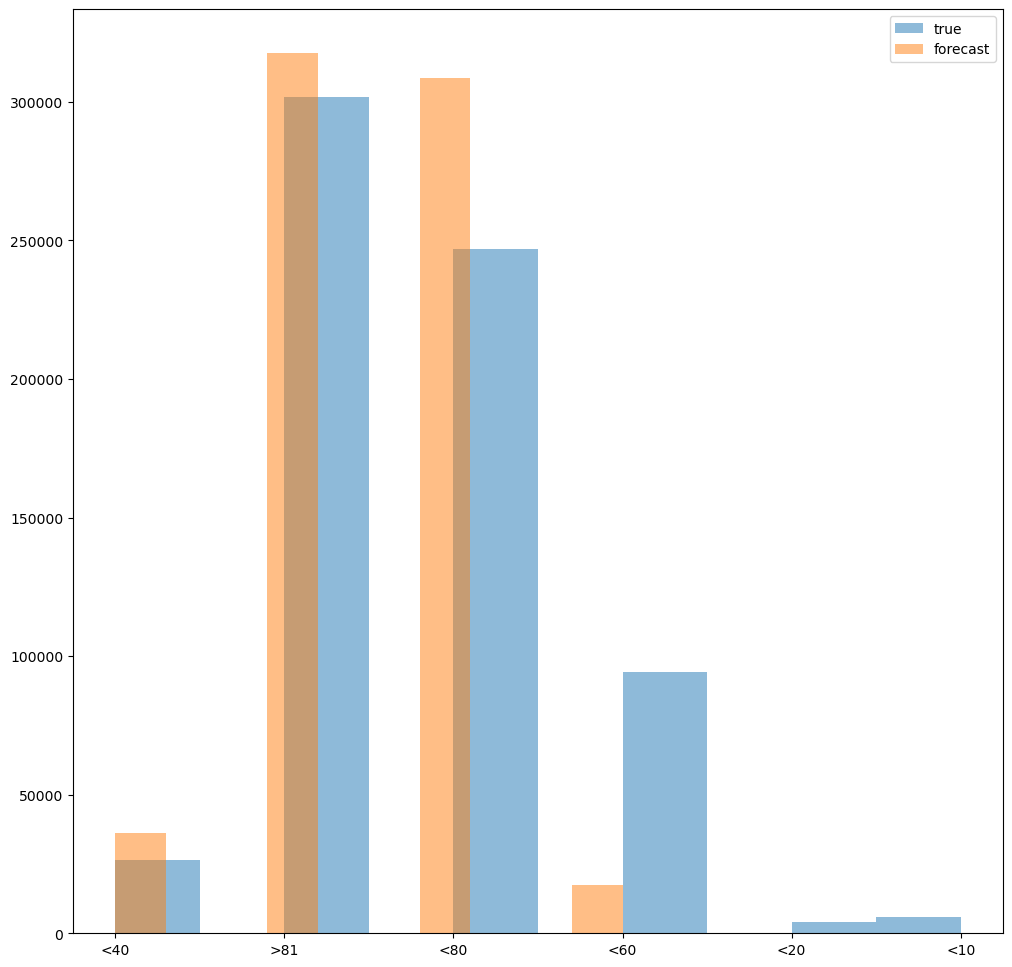

In [47]:
plt.hist(res['true'], bins = 10, alpha=0.5, label='true')
plt.hist(res['forecast'], bins = 10, alpha=0.5, label='forecast')
plt.legend(loc='upper right')
plt.show()

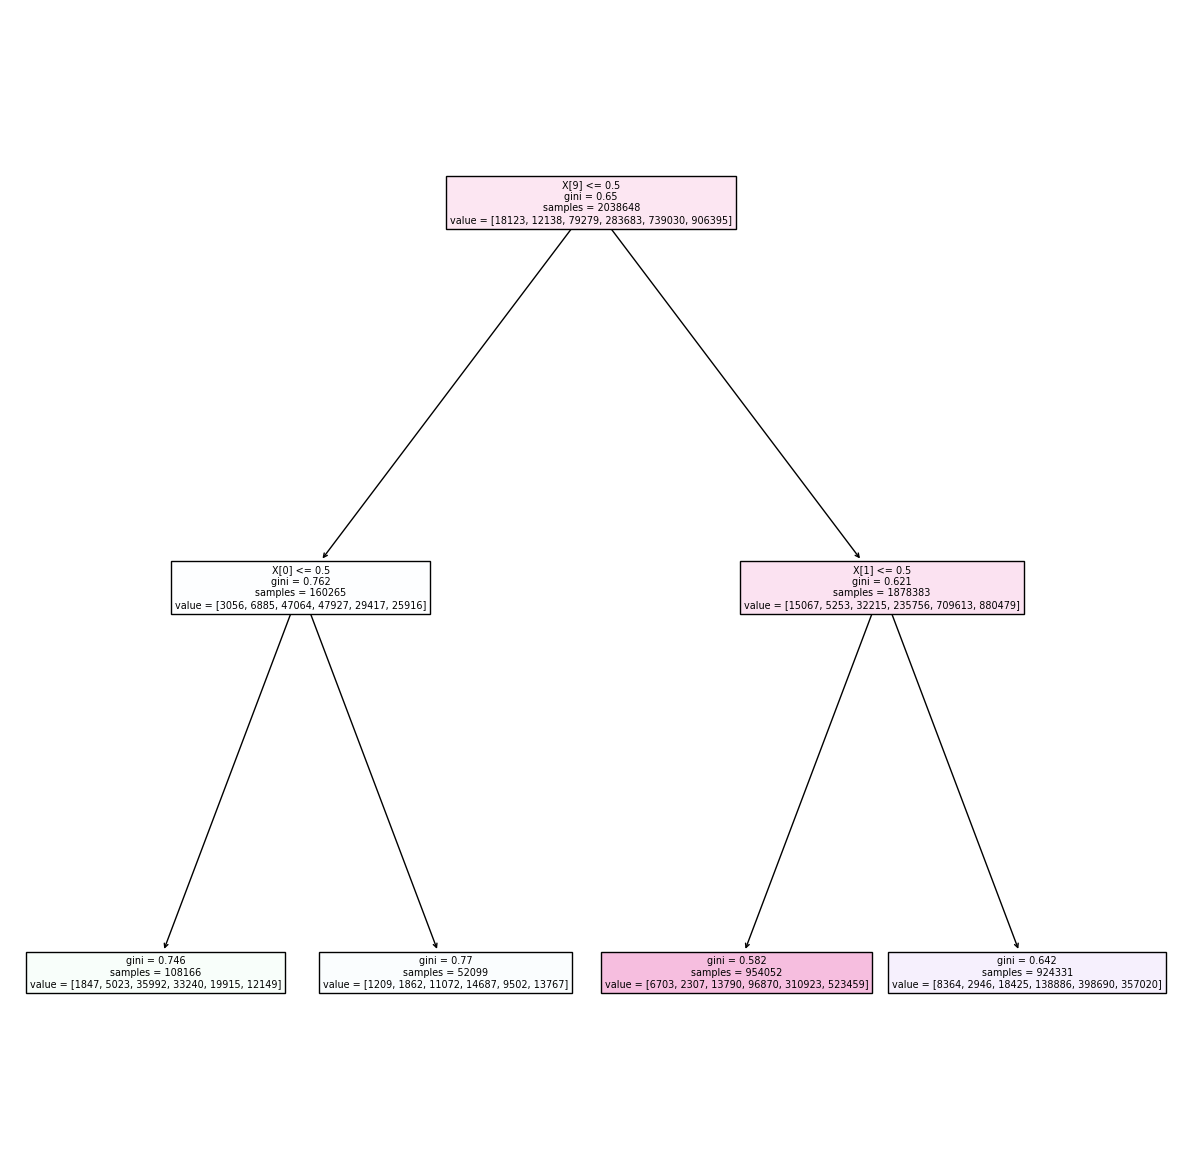

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(model, filled=True, impurity=True) 
plt.show()

https://habrastorage.org/r/w1560/getpro/habr/upload_files/549/ecf/f39/549ecff39d992c1cd145a1f41faa5f5a.png